Source: https://www.kaggle.com/datasets/monicahjones/steps-tracker-dataset

# Data fetching and loading

In [41]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("monicahjones/steps-tracker-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Ranzeplay\.cache\kagglehub\datasets\monicahjones\steps-tracker-dataset\versions\1


In [61]:
from kagglehub import KaggleDatasetAdapter
from pandas import DataFrame

df: DataFrame = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "monicahjones/steps-tracker-dataset",
    "steps_tracker_dataset.csv",
)

df.date = pd.to_datetime(df.date, format="%d/%m/%Y")
df = df.sort_values(by="date")
df.reset_index(drop=True, inplace=True)

df.head(10)

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,2022-01-04,16168,12.13,485.04,162,6.2,0.06,stressed
1,2022-01-04,6433,4.82,192.99,64,7.0,4.45,tired
2,2022-01-05,3946,2.96,118.38,39,5.3,3.77,happy
3,2022-01-05,783,0.59,23.49,8,10.4,3.84,happy
4,2022-01-06,15995,12.00,479.85,160,7.0,4.42,stressed
5,2022-01-07,2100,1.58,63.00,21,8.0,0.20,energetic
6,2022-01-08,12247,9.19,367.41,122,9.0,0.15,happy
7,2022-01-08,7129,5.35,213.87,71,9.0,2.20,tired
8,2022-01-09,19260,14.45,577.80,193,6.5,4.03,stressed
9,2022-01-09,16810,12.61,504.30,168,6.3,4.25,stressed


In [43]:
df.describe()

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
count,500,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,2022-07-02 06:54:43.200000,10238.572000,7.678800,307.157160,102.40800,7.292400,2.506580
min,2022-01-04 00:00:00,26.000000,0.020000,0.780000,0.00000,3.100000,0.040000
25%,2022-04-01 00:00:00,5313.250000,3.985000,159.397500,53.00000,6.000000,1.300000
50%,2022-06-28 00:00:00,10699.000000,8.025000,320.970000,107.00000,7.000000,2.495000
75%,2022-10-01 00:00:00,15317.500000,11.490000,459.525000,153.00000,8.225000,3.785000
max,2022-12-30 00:00:00,19979.000000,14.980000,599.370000,200.00000,12.000000,5.000000
std,NaN,5829.268207,4.371964,174.878046,58.29293,1.814046,1.426296


In [62]:
df['mood'].unique()

array(['stressed', 'tired', 'happy', 'energetic', 'sad'], dtype=object)

# Data preprocessing

In [60]:
df = df.groupby(by='date').median(numeric_only=True).reset_index()

df.head()

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
0,2022-01-04,11300.5,8.475,339.015,113.0,6.60,2.255
1,2022-01-05,2364.5,1.775,70.935,23.5,7.85,3.805
2,2022-01-06,15995.0,12.000,479.850,160.0,7.00,4.420
3,2022-01-07,2100.0,1.580,63.000,21.0,8.00,0.200
4,2022-01-08,9688.0,7.270,290.640,96.5,9.00,1.175


In [45]:
df.describe()

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
count,268,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,2022-07-01 02:51:56.417910528,10242.035448,7.681399,307.261063,102.445896,7.319403,2.541175
min,2022-01-04 00:00:00,470.000000,0.350000,14.100000,5.000000,3.300000,0.070000
25%,2022-04-02 18:00:00,6207.250000,4.660000,186.217500,62.000000,6.475000,1.767500
50%,2022-07-01 12:00:00,10825.500000,8.115000,324.765000,108.500000,7.000000,2.510000
75%,2022-09-27 06:00:00,14190.000000,10.640000,425.700000,142.000000,8.112500,3.350000
max,2022-12-30 00:00:00,19969.000000,14.980000,599.070000,200.000000,11.800000,4.950000
std,NaN,5107.825771,3.830726,153.234773,51.093894,1.503005,1.140248


# Data overview

## Single

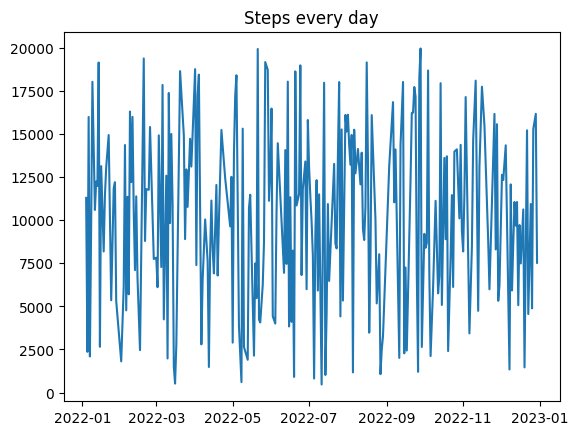

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Steps every day')
ax.plot(df['date'], df['steps'])
plt.show()

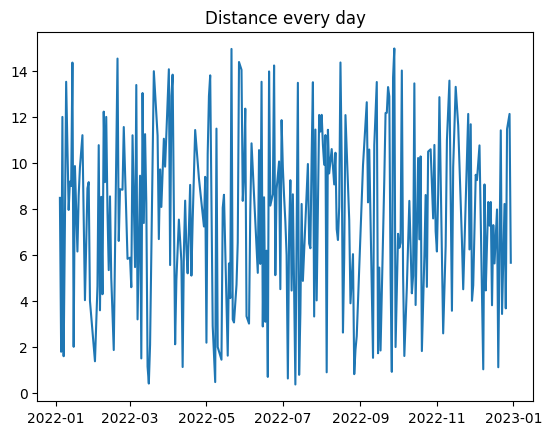

In [47]:
_, ax = plt.subplots()

ax.set_title('Distance every day')
ax.plot(df['date'], df['distance_km'])
plt.show()

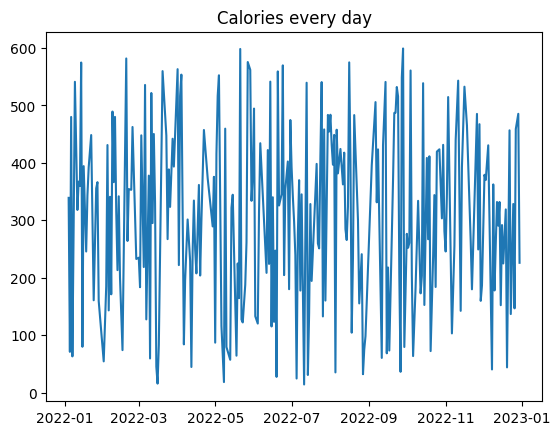

In [48]:
_, ax = plt.subplots()

ax.set_title('Calories every day')
ax.plot(df['date'], df['calories_burned'])
plt.show()

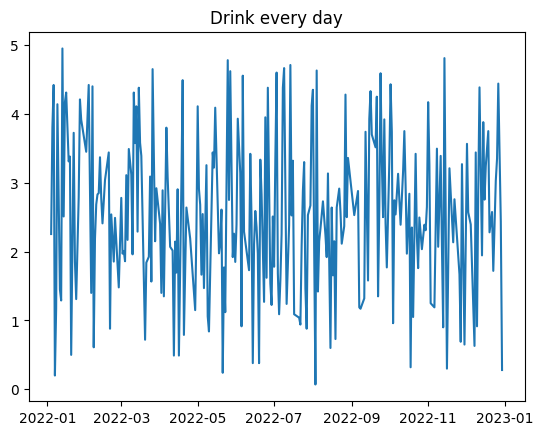

In [49]:
_, ax = plt.subplots()

ax.set_title('Drink every day')
ax.plot(df['date'], df['water_intake_liters'])
plt.show()

## Correlations

0.9999999999999997


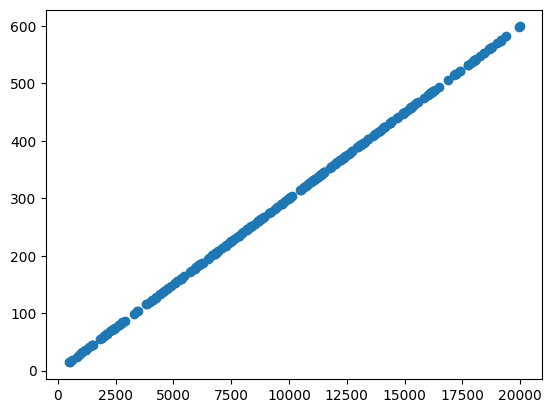

In [52]:
_, ax = plt.subplots()

print(df['steps'].corr(df['calories_burned']))

ax.scatter(df['steps'], df['calories_burned'])
plt.show()

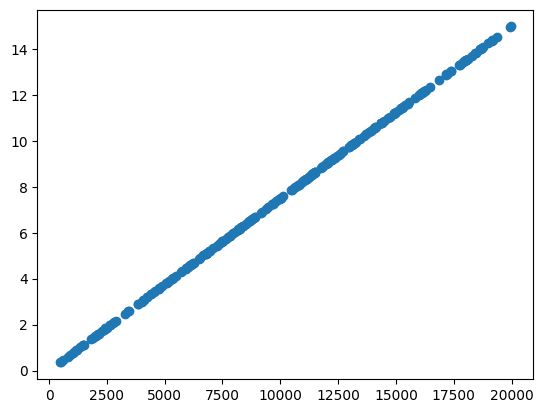

In [51]:
_, ax = plt.subplots()

ax.scatter(df['steps'], df['distance_km'])
plt.show()

0.0576100251634948


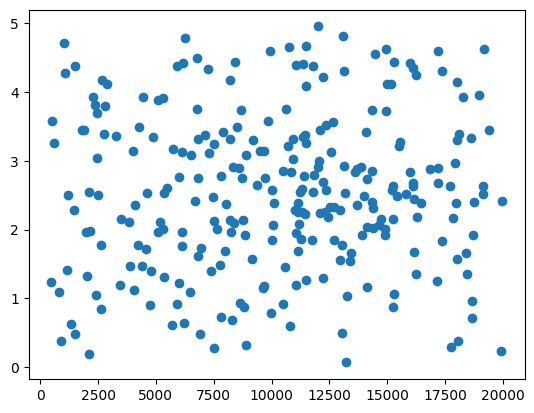

In [53]:
_, ax = plt.subplots()

print(df['steps'].corr(df['water_intake_liters']))

ax.scatter(df['steps'], df['water_intake_liters'])
plt.show()

0.057645288345500506


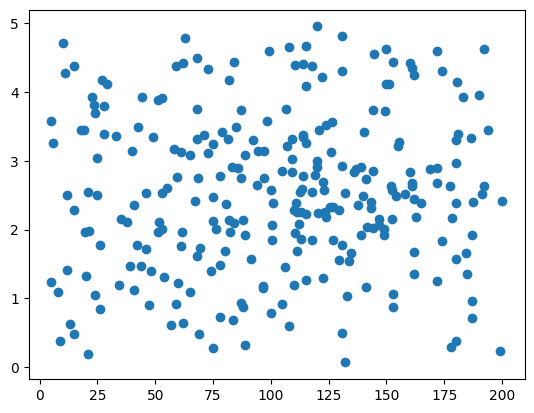

In [56]:
_, ax = plt.subplots()

print(df['active_minutes'].corr(df['water_intake_liters']))

ax.scatter(df['active_minutes'], df['water_intake_liters'])
plt.show()

In [59]:
df.head()

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
0,2022-01-04,11300.5,8.475,339.015,113.0,6.60,2.255
1,2022-01-05,2364.5,1.775,70.935,23.5,7.85,3.805
2,2022-01-06,15995.0,12.000,479.850,160.0,7.00,4.420
3,2022-01-07,2100.0,1.580,63.000,21.0,8.00,0.200
4,2022-01-08,9688.0,7.270,290.640,96.5,9.00,1.175
